Sean $X_1,\dots,X_n$ v.a.i.i.d. de una distribución con densidad $f$. Se considera el estimador del núcleo $\hat{f}$ con núcleo rectangular $K(x) = \mathbb I_{[-1/2,1/2]}(x)$ y parámetro de suavizado $h$.

Calcula el sesgo y la varianza de $\hat f(x)$ para un valor de $x$ fijo.

Demuestra que tanto el sesgo como la varianza tienden a cero si $h\to 0$ y %nh\to \infty$


Tenemos que calcular $E\left[\hat{f}(x)\right]$. Vamos primero a expresar el núcleo de otra manera. Tenemos que tratar con $ K\left( \frac{x - X_i}{h}\right)$, siendo $K$ la función indicadora en el intervalo $(-1/2,1/2)$.  Podemos ver entonces que 
$$
 K\left( \frac{x - X_i}{h}\right) = \mathbb I_{(-1/2,1/2)} \left( \frac{x - X_i}{h}\right) = 
 \begin{cases}
 1 & \left| \frac{x - X_i}{h} \right| < \frac{1}{2}\\
 0 & \text{else}
 \end{cases}
$$
Por lo que, si despejamos del miembro superior de la última igualdad, obtenemos que esta función será $1$ cuando:
$$
-\frac{h}{2} < x - X_i < \frac{h}{2} \Longleftrightarrow x - \frac{h}{2} < \lvert X_i \rvert <  x +\frac{h}{2} 
$$

Vemos que
\begin{align*}
E\left[\hat{f}(x)\right] & = E \left[ \frac{1}{nh} \sum K\left( \frac{x - X_i}{h}\right)\right]\\
 & = \frac{1}{nh}  \sum  E \left[  K\left( \frac{X_i - t}{h}\right) \right] \\
 &= \frac{1}{nh}  \sum \int  K\left( \frac{X_i - t}{h}\right) f(t) dt \\
 & = \frac{1}{nh} \sum \int_{-\frac{h}{2} - x}^{\frac{h}{2}  + x} f(t) dt\\
 & =  \frac{1}{nh} \sum  P\left(x -\frac{h}{2}  \leq X_i \leq x + \frac{h}{2}\right)
\end{align*}
Ahora, como estas probabilidades son la misma para cualquiera de las $X_i$ y sabiendo que los miembros de la sumatoria son la definición de la función de distribución, podemos escribir eso como:
$$
E\left[\hat{f}(x)\right] = \frac{F(x + \frac{h}{2}) - F(x -\frac{h}{2})}{h}
$$

Con esto, podemos decir que
$$
Bias(\hat{f}(x)) = E\left[\hat{f}(x)\right] - f(x) = \frac{F(x + \frac{h}{2}) - F(x -\frac{h}{2})}{h} - f(x)
$$

Vamos a calcular ahora la varianza de $\hat{f}(x)$. Sabemos que
$$
Var(\hat{f}(x)) = Var\left(\frac{1}{nh} \sum K\left( \frac{x - X_i}{h}\right)\right) = \frac{1}{n^2 h^2} \sum Var\left(K\left( \frac{x - X_i}{h}\right)\right) = \frac{n}{n^2 h^2} Var\left(K\left( \frac{x - X_i}{h}\right)\right)
$$
Donde, en la última igualdad hemos usado que la varianza para todas las variables es la misma pues siguen la misma $f$. Calculemos entonces $Var\left(K\left( \frac{x - X_i}{h}\right)\right)$.
$$
Var\left(K\left( \frac{x - X_i}{h}\right)\right) = E\left[K\left( \frac{x - X_i}{h}\right)^2\right] - E\left[K\left( \frac{x - X_i}{h}\right)\right]^2
$$
Pero, sabemos que al ser una función indicadora, $K(x)^2 = K(x)$, por lo que tenemos (usando lo que hemos calculado en el ejercicio anterior):
\begin{align*}
Var\left(K\left( \frac{x - X_i}{h}\right)\right) & = E\left[K\left( \frac{x - X_i}{h}\right)\right] - E\left[K\left( \frac{x - X_i}{h}\right)\right]^2 \\
& = P\left(x -\frac{h}{2}  \leq X_i \leq x + \frac{h}{2}\right) - P\left(x -\frac{h}{2}  \leq X_i \leq x + \frac{h}{2}\right)^2\\
& = \left(F\left(x + \frac{h}{2}\right) - F\left(x -\frac{h}{2}\right)\right)  \left(1 - \left(F(x + \frac{h}{2}) - F(x -\frac{h}{2})\right)\right)
\end{align*}
Por lo que 
$$
Var(\hat{f}(x)) = \frac{\left(F\left(x + \frac{h}{2}\right) - F\left(x -\frac{h}{2}\right)\right)  \left(1 - \left(F(x + \frac{h}{2}) - F(x -\frac{h}{2})\right)\right)}{n h^2}
$$


Ahora, nos queda evaluar los límites cuando $h\to 0$ y cuando $nh\to 0$. En el primer caso, basta ver que:
\begin{align*}
\lim_{h\to 0}  \frac{F(x + \frac{h}{2}) - F(x -\frac{h}{2})}{h}& = \frac{1}{2}\left(\lim_{h\to 0} \frac{F(x+h/2) - F(x) + F(x) - F(x-h/2)}{h}\right) \\
 & = \frac{1}{2}\left(\lim_{h/2\to 0}\frac{F(x+h/2) - F(x)}{h/2} - \lim_{h/2\to 0}\frac{F(x-h/2) - F(x)}{-h/2}\right)\\
&= \frac{2 F'(x)}{2}\\
& = f(x)
\end{align*}

Por tanto, tenemos que
$$
\lim_{h\to 0} Bias(\hat{f}(x)) =  \lim_{h\to 0}\left(\frac{F(x + \frac{h}{2}) - F(x -\frac{h}{2})}{h} - f(x)\right) = \lim_{h\to 0} \left(f(x) - f(x)\right) = 0
$$
Ahora, hacemos el mismo proceso para la varianza:

\begin{align*}
\lim_{\substack{nh \to \infty \\ h \to 0}} Var(\hat{f}(x))  &= \lim_{\substack{nh \to \infty \\ h \to 0}}\frac{ \left(F\left(x + \frac{h}{2}\right) - F\left(x -\frac{h}{2}\right)\right)  \left(1 - \left(F(x + \frac{h}{2}) - F(x -\frac{h}{2})\right)\right)}{n h^2} \\
& = \lim_{\substack{nh \to \infty \\ h \to 0}} \left( \frac{1}{nh} f(x)\left(1 - \left(F(x + \frac{h}{2}) - F(x -\frac{h}{2})\right)\right)\right)\\
& =  \lim_{\substack{nh \to \infty \\ h \to 0}} \left( \frac{1}{nh} f(x)\right)\\
& = 0
\end{align*}



Incluimos las librerías y opciones necesarias para el correcto funcionamiento del ejercicio.

In [1]:

suppressMessages(library(tidyverse))
suppressMessages(library(reshape2))
defaultW <- getOption("warn")
options(warn = -1)
library(patchwork)
options(repr.plot.width=12, repr.plot.height=8)
set.seed(123)

Representamos de forma gráfica la p.d.f. y la función de distribución.

Fijamos los valores $\alpha$ y $\beta$ para la distribución beta.

In [2]:
alpha <- 3
beta <- 6

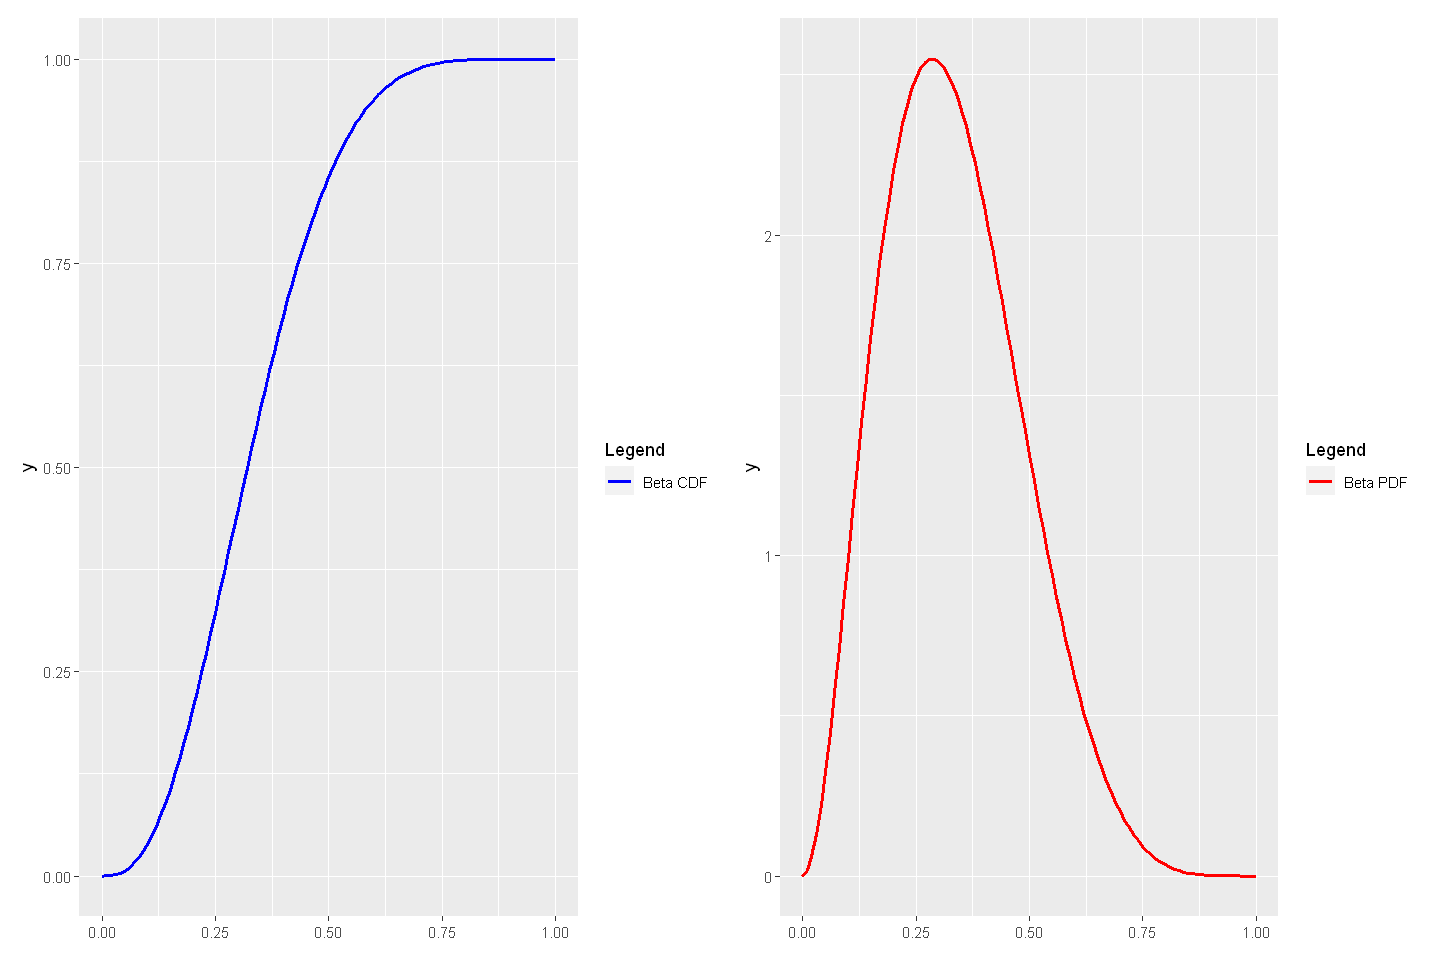

In [3]:

plot1 <- ggplot(NULL) + stat_function(fun = function(x) pbeta(x, alpha, beta), aes(colour = "Beta CDF"),size = 1) + scale_color_manual("Legend",values=c("blue"))
plot2 <- ggplot(NULL) + stat_function(fun = function(x) dbeta(x, alpha, beta), aes(colour = "Beta PDF"),size = 1) + scale_color_manual("Legend",values=c("red"))
plot1 + plot2 + plot_layout(widths = c(3, 3))

Vamos con el **segundo apartado**. Vamos a extraer de la distribución beta una muestra de tamaño $20$, hallaremos el estimador del núcleo y dibujaremos tanto la función de densidad como el estimador del núcleo que nos da la función `density` de `R`.

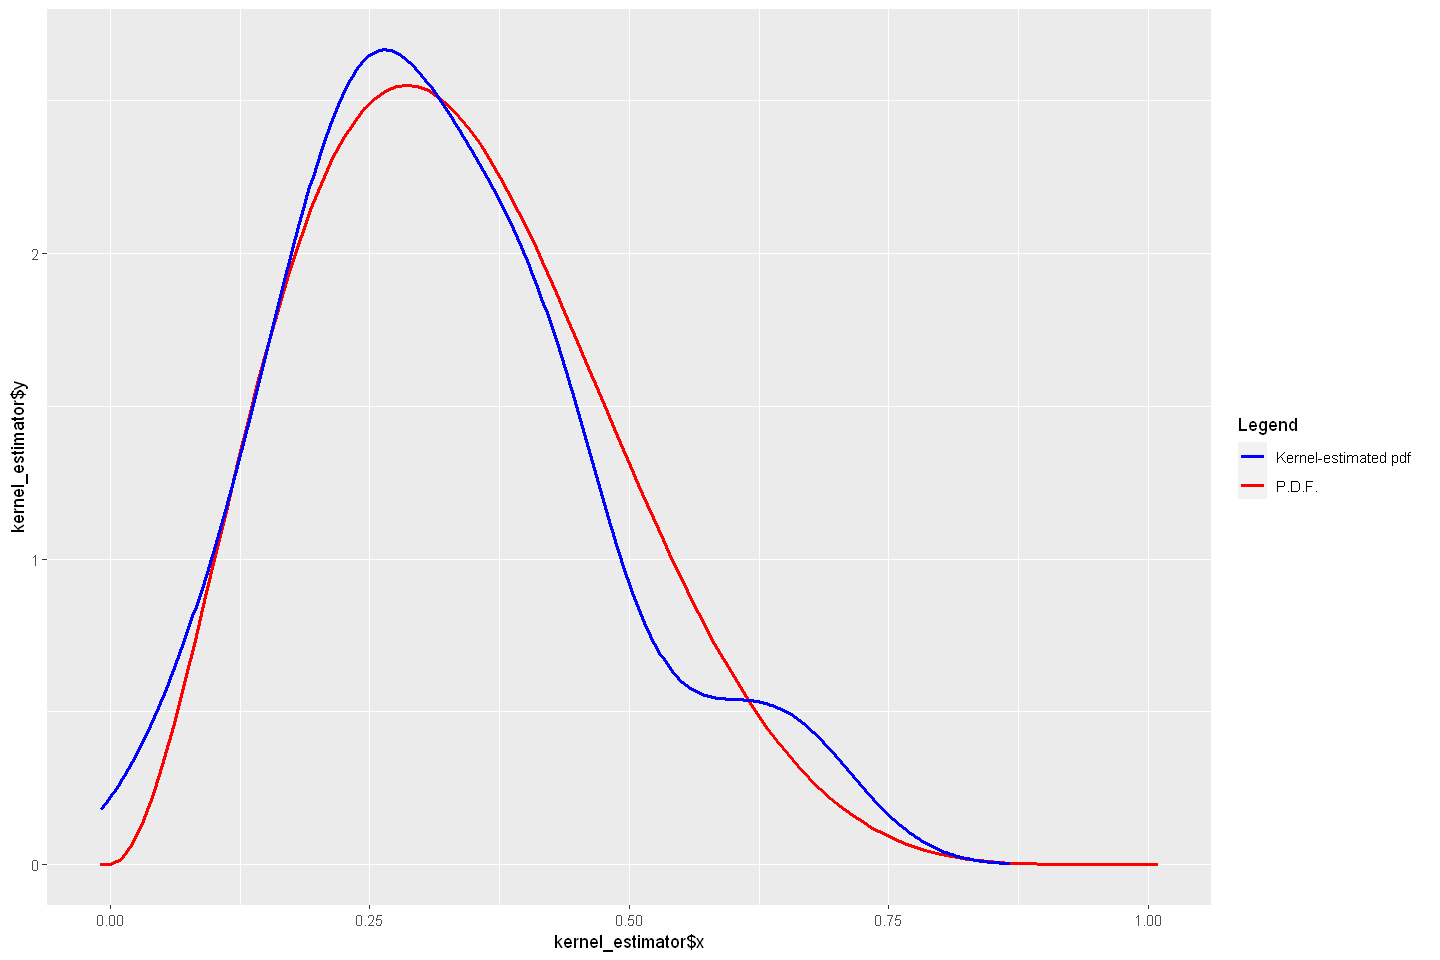

In [4]:

n <- 20
# Extract sample
sample <- rbeta(n,alpha,beta)
# Kernel estimator
kernel_estimator <- density(sample)

ggplot(NULL) +
    stat_function(fun=dbeta,aes(colour='P.D.F.'),args=list(shape1=alpha,shape2=beta),size=1)+
    geom_line(aes(x=kernel_estimator$x,y=kernel_estimator$y,colour="Kernel-estimated pdf"),size=1)+
    scale_color_manual("Legend",values=c("blue","red"))+
    xlim(-0.01,1.01)
    

A continuación, dibujamos la función de distribución teórica comparándola con la $F_n$ empírica obtenida por la muestra anterior.

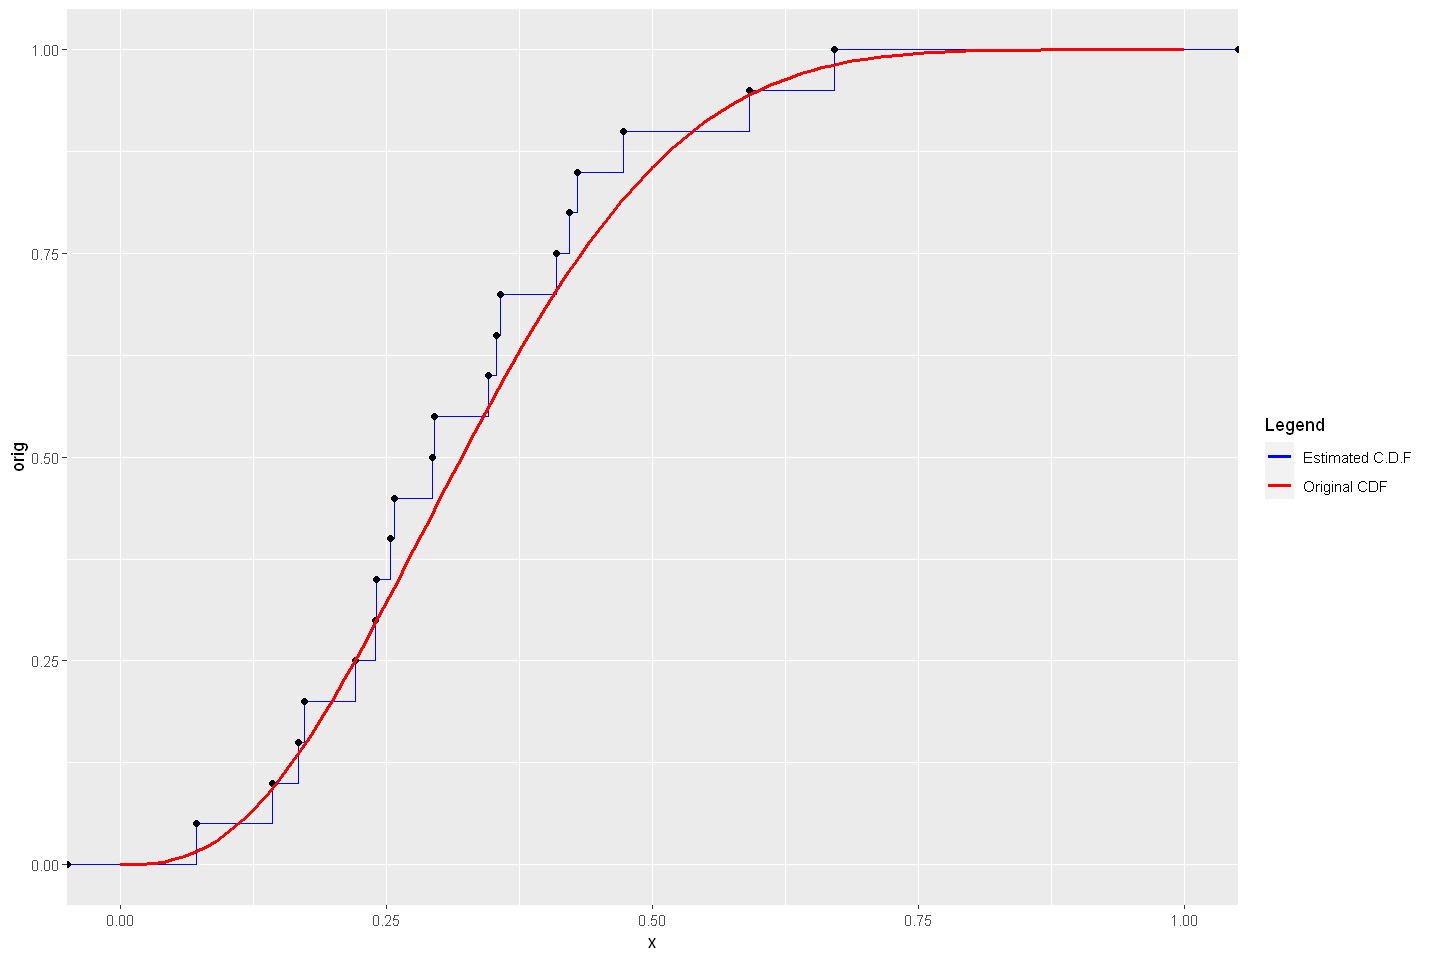

In [5]:
x <- seq(0, 1, 0.01) 
orig <- pbeta(x, shape1 = alpha, shape2 = beta)
data <- data.frame( x = sample)
ggplot(NULL)+
    stat_ecdf(data = data,aes(x,colour="Estimated C.D.F")) +
    stat_ecdf(data = data,aes(x), geom = 'point') +
    geom_line(aes(x,orig,colour="Original CDF"),size=1)+
    scale_color_manual("Legend",values=c("blue","red"))
    

Por último, realizamos el **tercer apartado**. Vamos a realizar $200$ experimentos en los que extraemos $n=20$ muestras y, para cada una de ellas calcularemos el error entre el estimador del núcleo de la muestra y la función de densidad teórica. Haremos lo mismo con la función de distribución.

In [6]:
# Initialize variables
num_experiments <- 200
experiment_size <- 20
errors_f <- rep(NA,num_experiments)
p_values_f <- rep(NA,num_experiments)
errors_F <- rep(NA,num_experiments)
p_values_F <- rep(NA,num_experiments)
# Repeat experiment
for (i in 0:num_experiments){
    
    # Obtain sample, kernel estimator, and evaluate the xs obtained in the estimator
    sample <- rbeta(experiment_size,alpha,beta)
    # Kernel estimator from the sample
    kernel_estimator <- density(sample)
    # Obtain theoretical density values in the x coordinates
    true_fs <- dbeta(kernel_estimator$x,alpha,beta)
    
    # Obtain the empirical CDF and evaluate in the sample
    empirical_F <- ecdf(sample)
    #Obtain theoretical distribution function values in x coordinates
    true_Fs <- pbeta(kernel_estimator$x,alpha,beta)
    # Obtain empirical F in x coordinates
    Fs <- empirical_F(kernel_estimator$x)
    
    # Compute the KS test (provides distance and pvalue)
    test_f <- ks.test(kernel_estimator$y, true_fs)
    test_F <- ks.test(Fs,true_Fs)
    
    # Save the result
    errors_f[i+1] <- test_f$statistic
    errors_F[i+1] <- test_F$statistic
    
    p_values_f[i+1] <- test_f$p.value
    p_values_F[i+1] <- test_F$p.value

}


Podemos ahora mostrar la información que hemos obtenido. Mediante la función `summary`, mostramos un resumen de la misma.

In [7]:
print("Information about errors in the density function")
summary(errors_f)
print("p-values in the density function")
summary(p_values_f)

[1] "Information about errors in the density function"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.07617 0.14648 0.17969 0.18719 0.23047 0.34570 

[1] "p-values in the density function"


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.000e+00 0.000e+00 1.300e-07 1.777e-03 3.386e-05 1.025e-01 

In [8]:
print("Information about errors in the distribution function")
summary(errors_F)
print("p-values in the distribution function")
summary(p_values_F)

[1] "Information about errors in the distribution function"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1504  0.2031  0.2188  0.2170  0.2305  0.3184 

[1] "p-values in the distribution function"


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.000e+00 3.000e-12 4.600e-11 2.940e-07 1.338e-09 1.870e-05 

Podemos ver que la media de los errores es de $0.18$ en la función de densidad y de alrededor de $0.21$ en la función de distribución. Vemos que en ambos casos los p-values son prácticamente cero. Esto nos indica que nuestro nivel de significancia es bastante alto, es decir, que tenemos resultados significativos.